## Rendering all scenes

This test checks scene loading and basic rendering for all test scenes.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lmenv
env = lmenv.load('.lmenv')

In [3]:
import os
import imageio
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import lmscene
import lightmetrica as lm

In [4]:
os.getpid()

235

In [5]:
%load_ext lightmetrica_jupyter

In [6]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64


In [7]:
if not lm.Release:
    lm.debug.attach_to_debugger()

In [8]:
lm.comp.load_plugin(os.path.join(env.bin_path, 'accel_embree'))
lm.comp.load_plugin(os.path.join(env.bin_path, 'objloader_tinyobjloader'))

[I|0.033] Loading plugin [name='accel_embree']
[I|0.035] .. Successfully loaded [name='accel_embree']
[I|0.035] Loading plugin [name='objloader_tinyobjloader']
[I|0.035] .. Successfully loaded [name='objloader_tinyobjloader']


In [9]:
lm.objloader.init('tinyobjloader')

In [10]:
scene_names = lmscene.scenes_small()

[I|0.088] Loading asset [name='accel']
[I|0.089] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|0.089] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|0.089] Loading asset [name='scene']
[I|0.090] Loading asset [name='camera_main']
[I|0.090] Loading asset [name='model_obj']


[I|0.402] .. Loading texture [path='wood.ppm']
[I|0.492] .. Loading texture [path='leaf.ppm']
[I|0.494] .. Loading texture [path='picture8.ppm']
[I|0.525] .. Loading texture [path='wood5.ppm']
[I|0.585] Building acceleration structure [name='accel']
[I|0.585] .. Flattening scene
[I|0.589] .. Building


[I|0.638] Loading asset [name='film_output']
[I|0.715] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

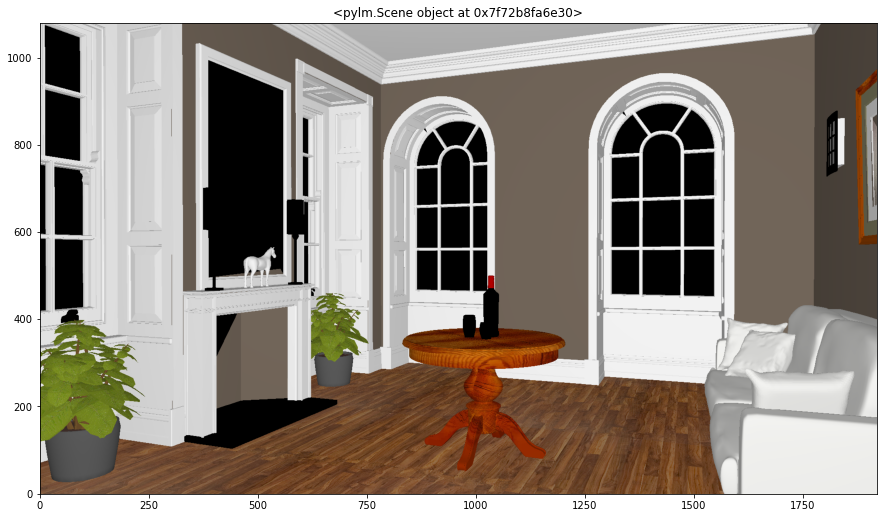

[I|3.414] Loading asset [name='accel']
[I|3.415] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|3.415] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|3.415] Loading asset [name='scene']
[I|3.415] Loading asset [name='camera_main']
[I|3.415] Loading asset [name='model_obj']
[I|3.418] Building acceleration structure [name='accel']
[I|3.418] .. Flattening scene
[I|3.418] .. Building
[I|3.419] Loading asset [name='film_output']
[I|3.496] Loading asset [name='renderer']


[W|3.417] .. Both `d` and `Tr` parameters defined for "light". Use the value of `d` for dissolve (line 76 in .mtl.)



  0%|          | 0/2073600 [00:00<?, ?it/s]

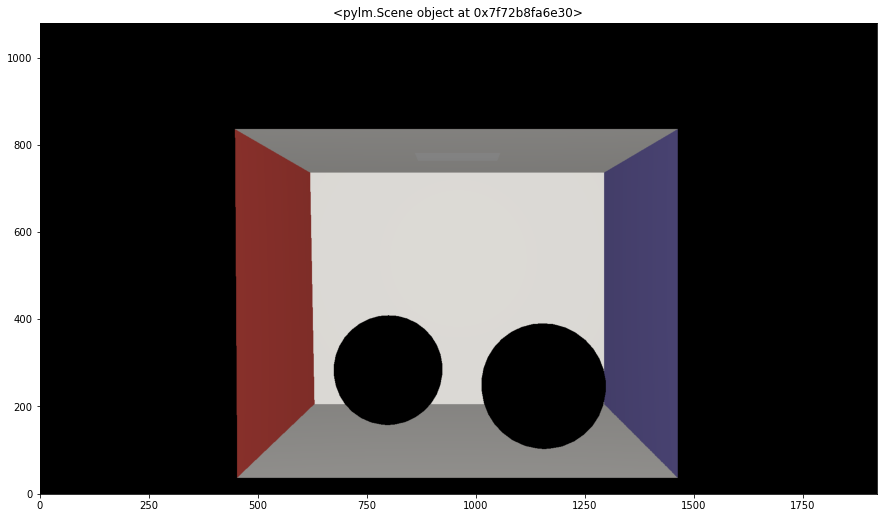

[I|5.362] Loading asset [name='accel']
[I|5.375] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|5.375] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|5.376] Loading asset [name='scene']
[I|5.376] Loading asset [name='camera_main']
[I|5.376] Loading asset [name='model_obj']
[I|5.376] .. Loading texture [path='default.png']
[I|5.387] Building acceleration structure [name='accel']
[I|5.387] .. Flattening scene
[I|5.387] .. Building
[I|5.387] Loading asset [name='film_output']
[I|5.464] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

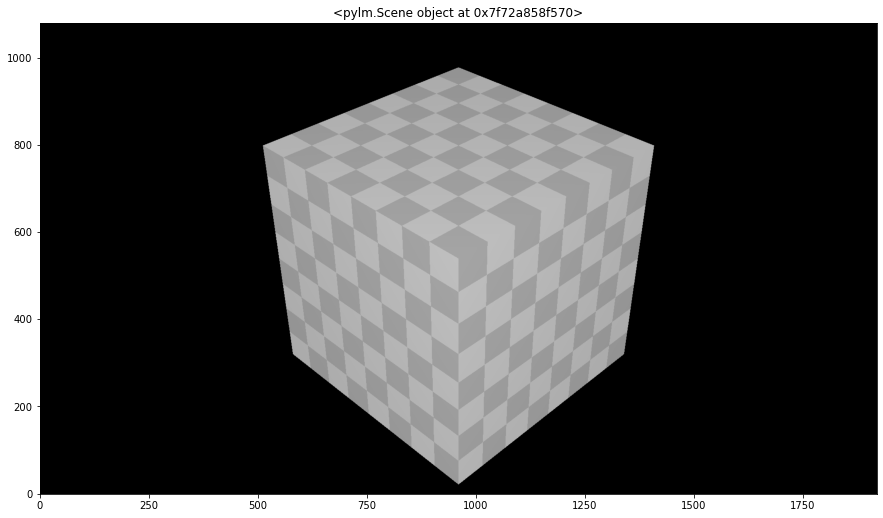

In [11]:
for scene_name in scene_names:
    lm.reset()
    
    # Load scene
    accel = lm.load_accel('accel', 'embree')
    scene = lm.load_scene('scene', 'default', accel=accel)
    lmscene.load(scene, env.scene_path, scene_name)
    scene.build()
    
    # Render
    film = lm.load_film('film_output', 'bitmap', w=1920, h=1080)
    renderer = lm.load_renderer('renderer', 'raycast', scene=scene, output=film)
    renderer.render()
    
    # Visualize
    img = np.copy(film.buffer())
    f = plt.figure(figsize=(15,15))
    ax = f.add_subplot(111)
    ax.imshow(np.clip(np.power(img,1/2.2),0,1), origin='lower')
    ax.set_title(scene)
    plt.show()